# CO543 - Image Processing
## Lab 04 - Part 01

- E/19/129
- K. H. Gunawardana


In [1]:
# import os
# from google.colab import drive

# path = "/content/drive/My Drive/ML/CO543/lab04/"

# # Mount Google Drive
# drive.mount('/content/drive')

In [3]:
# import modules
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Using K-means algorithm Identify the different clusters of MNIST Handwritten Digits

##### Data importing and pre-processing

In [4]:
# Load the dataset
path = "E:\\Education\\Academic\\3rd YEAR\\6th Sem\\CO543 Image Processing\\data\\lab04\\part01\\"

mnist = pd.read_csv(path + 'train.csv')

# Separate features and labels
X = mnist.drop('label', axis=1).values
y = mnist['label'].values

X_scaled = X

# Reduce dimensionality with PCA to visualize in 2D
pca = PCA(n_components=3)
pca2d = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca2d = pca2d.fit_transform(X_scaled)

In [6]:
mnist

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Elbow Method and Silhouetter Medthod

In [7]:
# Elbow Method
wcss = []
for i in range(4, 24, 2):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(4, 24, 2), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Method
silhouette_scores = []
for i in range(4, 24, 2):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(4, 24, 2), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


##### K-Mean Clustering 

In [6]:
# Applying K-Means with the chosen number of clusters
optimal_clusters = 16
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
mnist['cluster'] = y_kmeans

f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


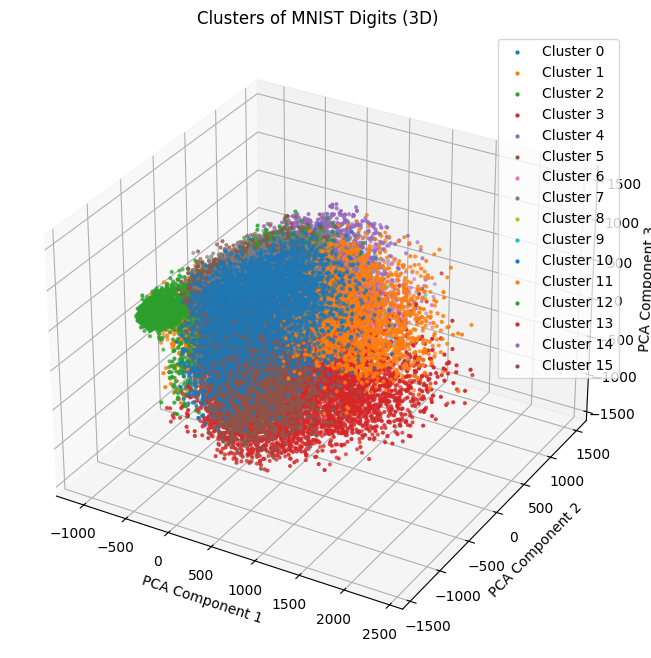

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(optimal_clusters):
    ax.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], X_pca[y_kmeans == i, 2], label=f'Cluster {i}', s=4)  

ax.set_title('Clusters of MNIST Digits (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()

# Enable interactivity for rotation
plt.show()


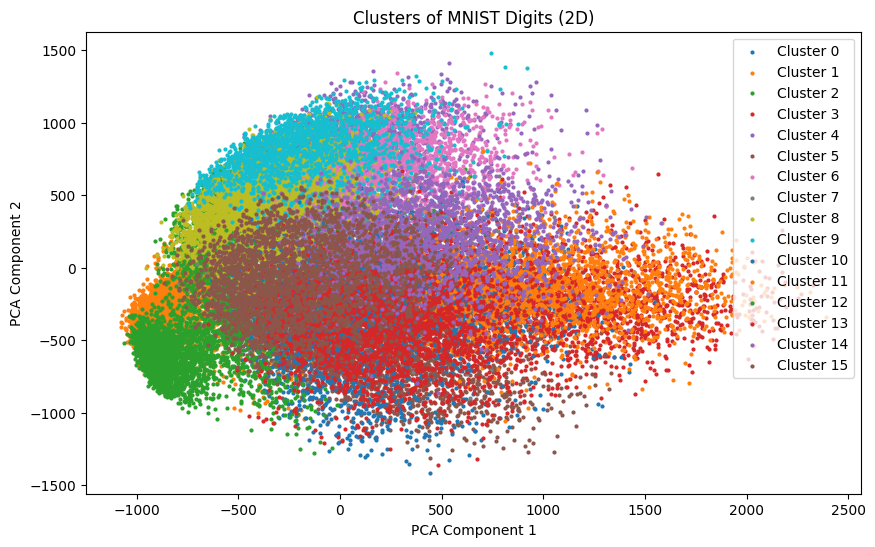

In [8]:
# Visualize the clusters using the PCA reduced data
plt.figure(figsize=(10, 6))

for i in range(optimal_clusters):
    plt.scatter(X_pca2d[y_kmeans == i, 0], X_pca2d[y_kmeans == i, 1], label=f'Cluster {i}', s=4)  

plt.title('Clusters of MNIST Digits (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


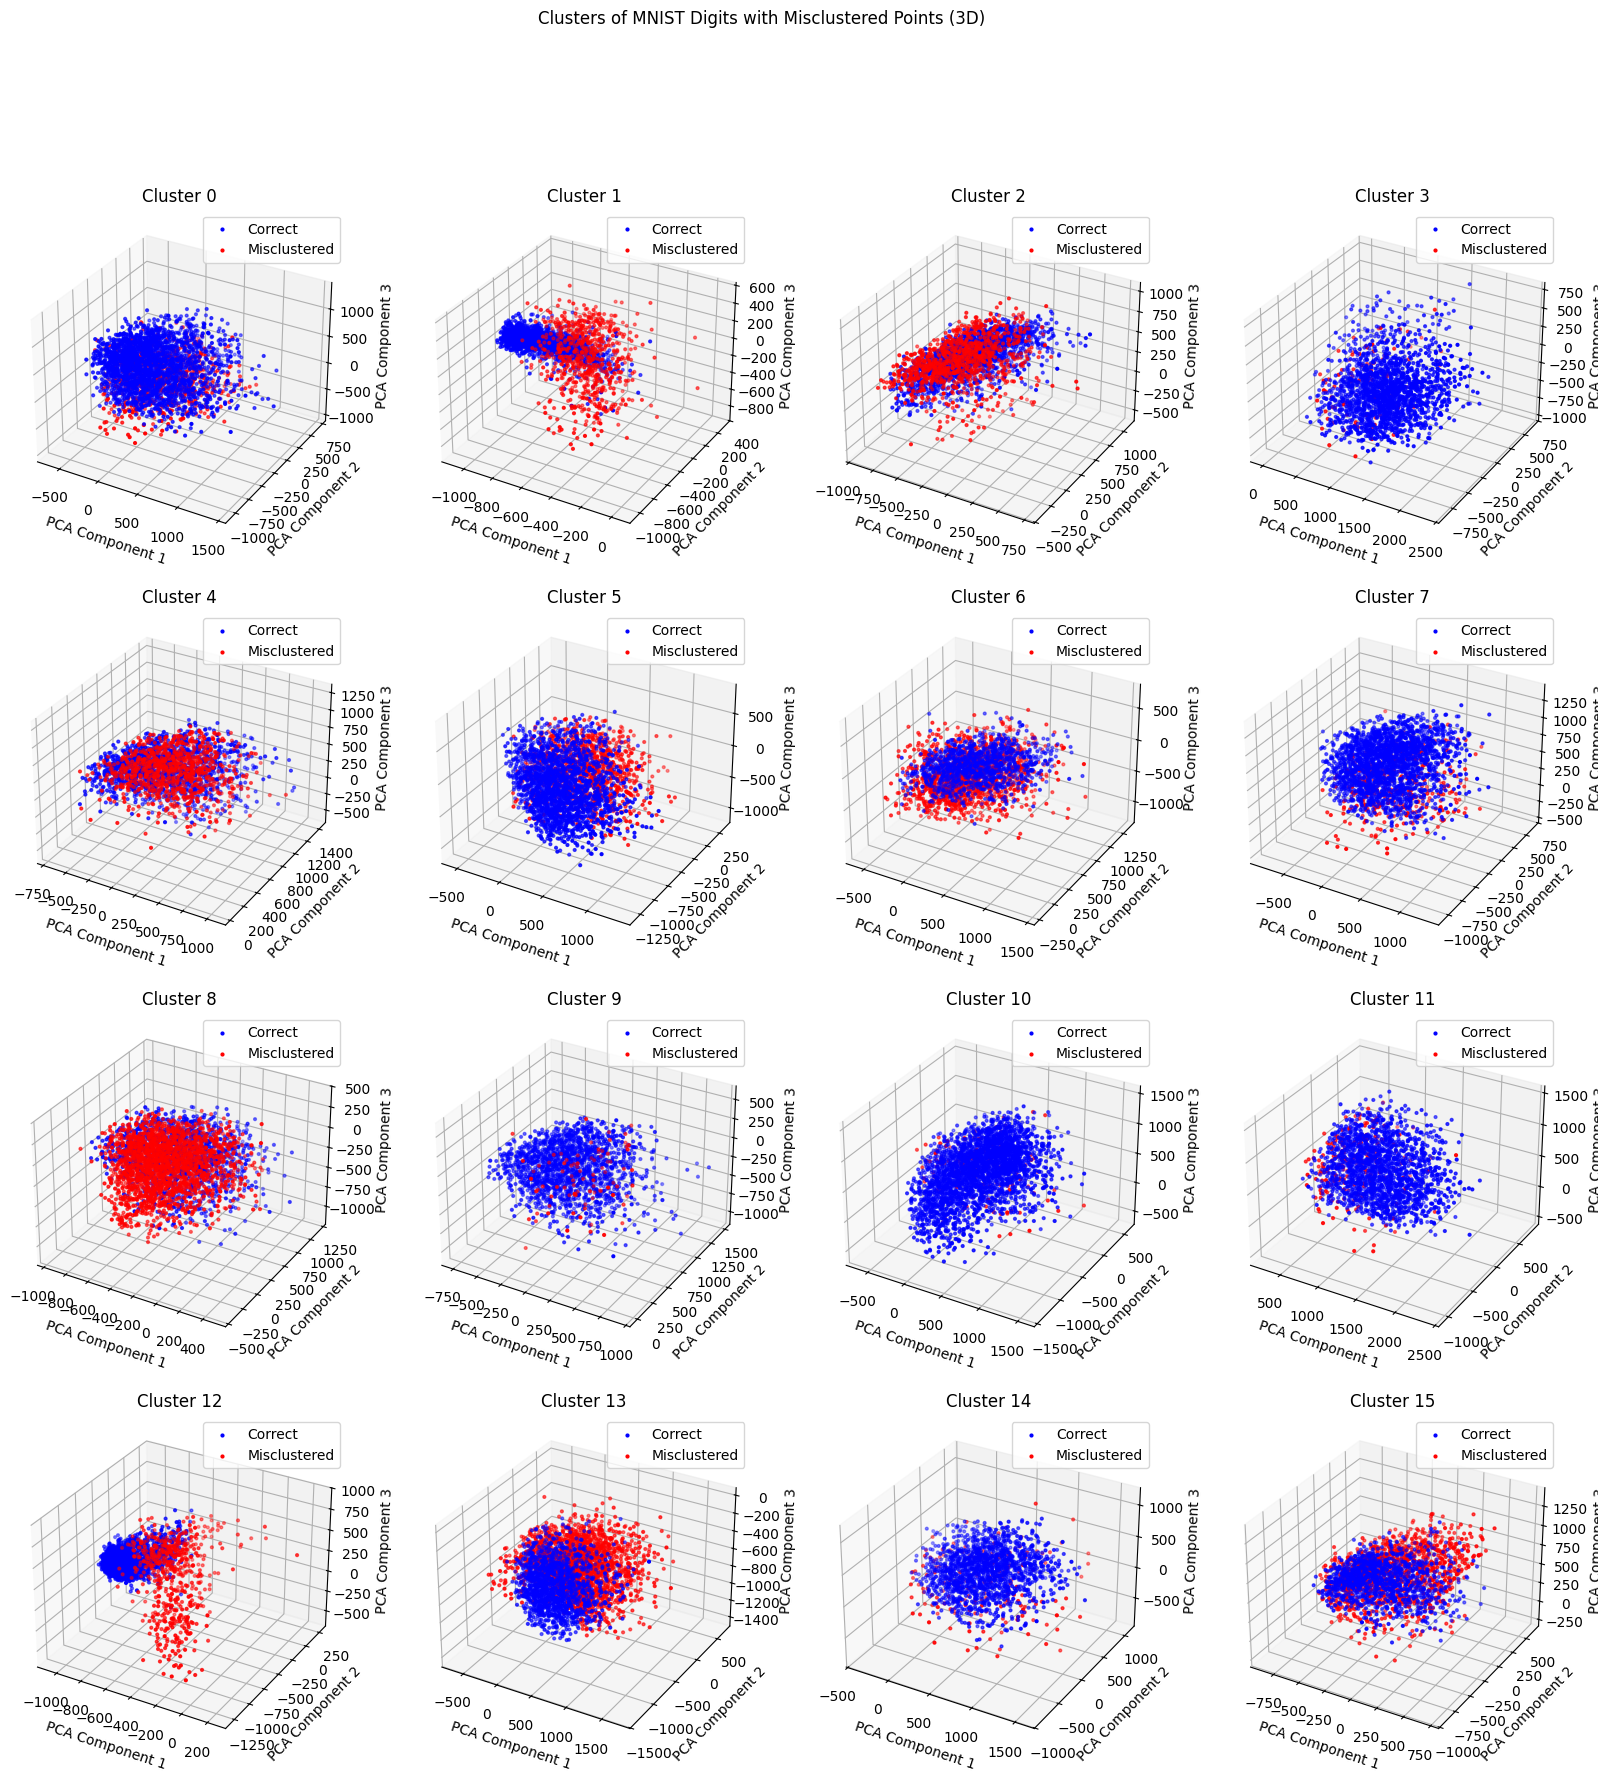

In [9]:
# Create subplots for each cluster
fig = plt.figure(figsize=(20, 20))
for i in range(optimal_clusters):
    ax = fig.add_subplot(4, 4, i+1, projection='3d')
    
    # Get indices of data points belonging to the current cluster
    cluster_indices = np.where(y_kmeans == i)[0]
    
    # Filter true labels and PCA-reduced data points for the current cluster
    cluster_labels = y[cluster_indices]
    cluster_data = X_pca[cluster_indices]
    
    # Find the most common true label in the current cluster
    most_common_label = np.bincount(cluster_labels).argmax()
    
    # Separate correctly clustered and misclustered points
    correct_points = cluster_data[cluster_labels == most_common_label]
    misclustered_points = cluster_data[cluster_labels != most_common_label]
    
    # Plot correctly clustered points in blue and misclustered points in red
    ax.scatter(correct_points[:, 0], correct_points[:, 1], correct_points[:, 2], color='blue', label='Correct', s=4)  
    ax.scatter(misclustered_points[:, 0], misclustered_points[:, 1], misclustered_points[:, 2], color='red', label='Misclustered', s=4)  
    
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    ax.legend()

plt.suptitle('Clusters of MNIST Digits with Misclustered Points (3D)')
plt.show()


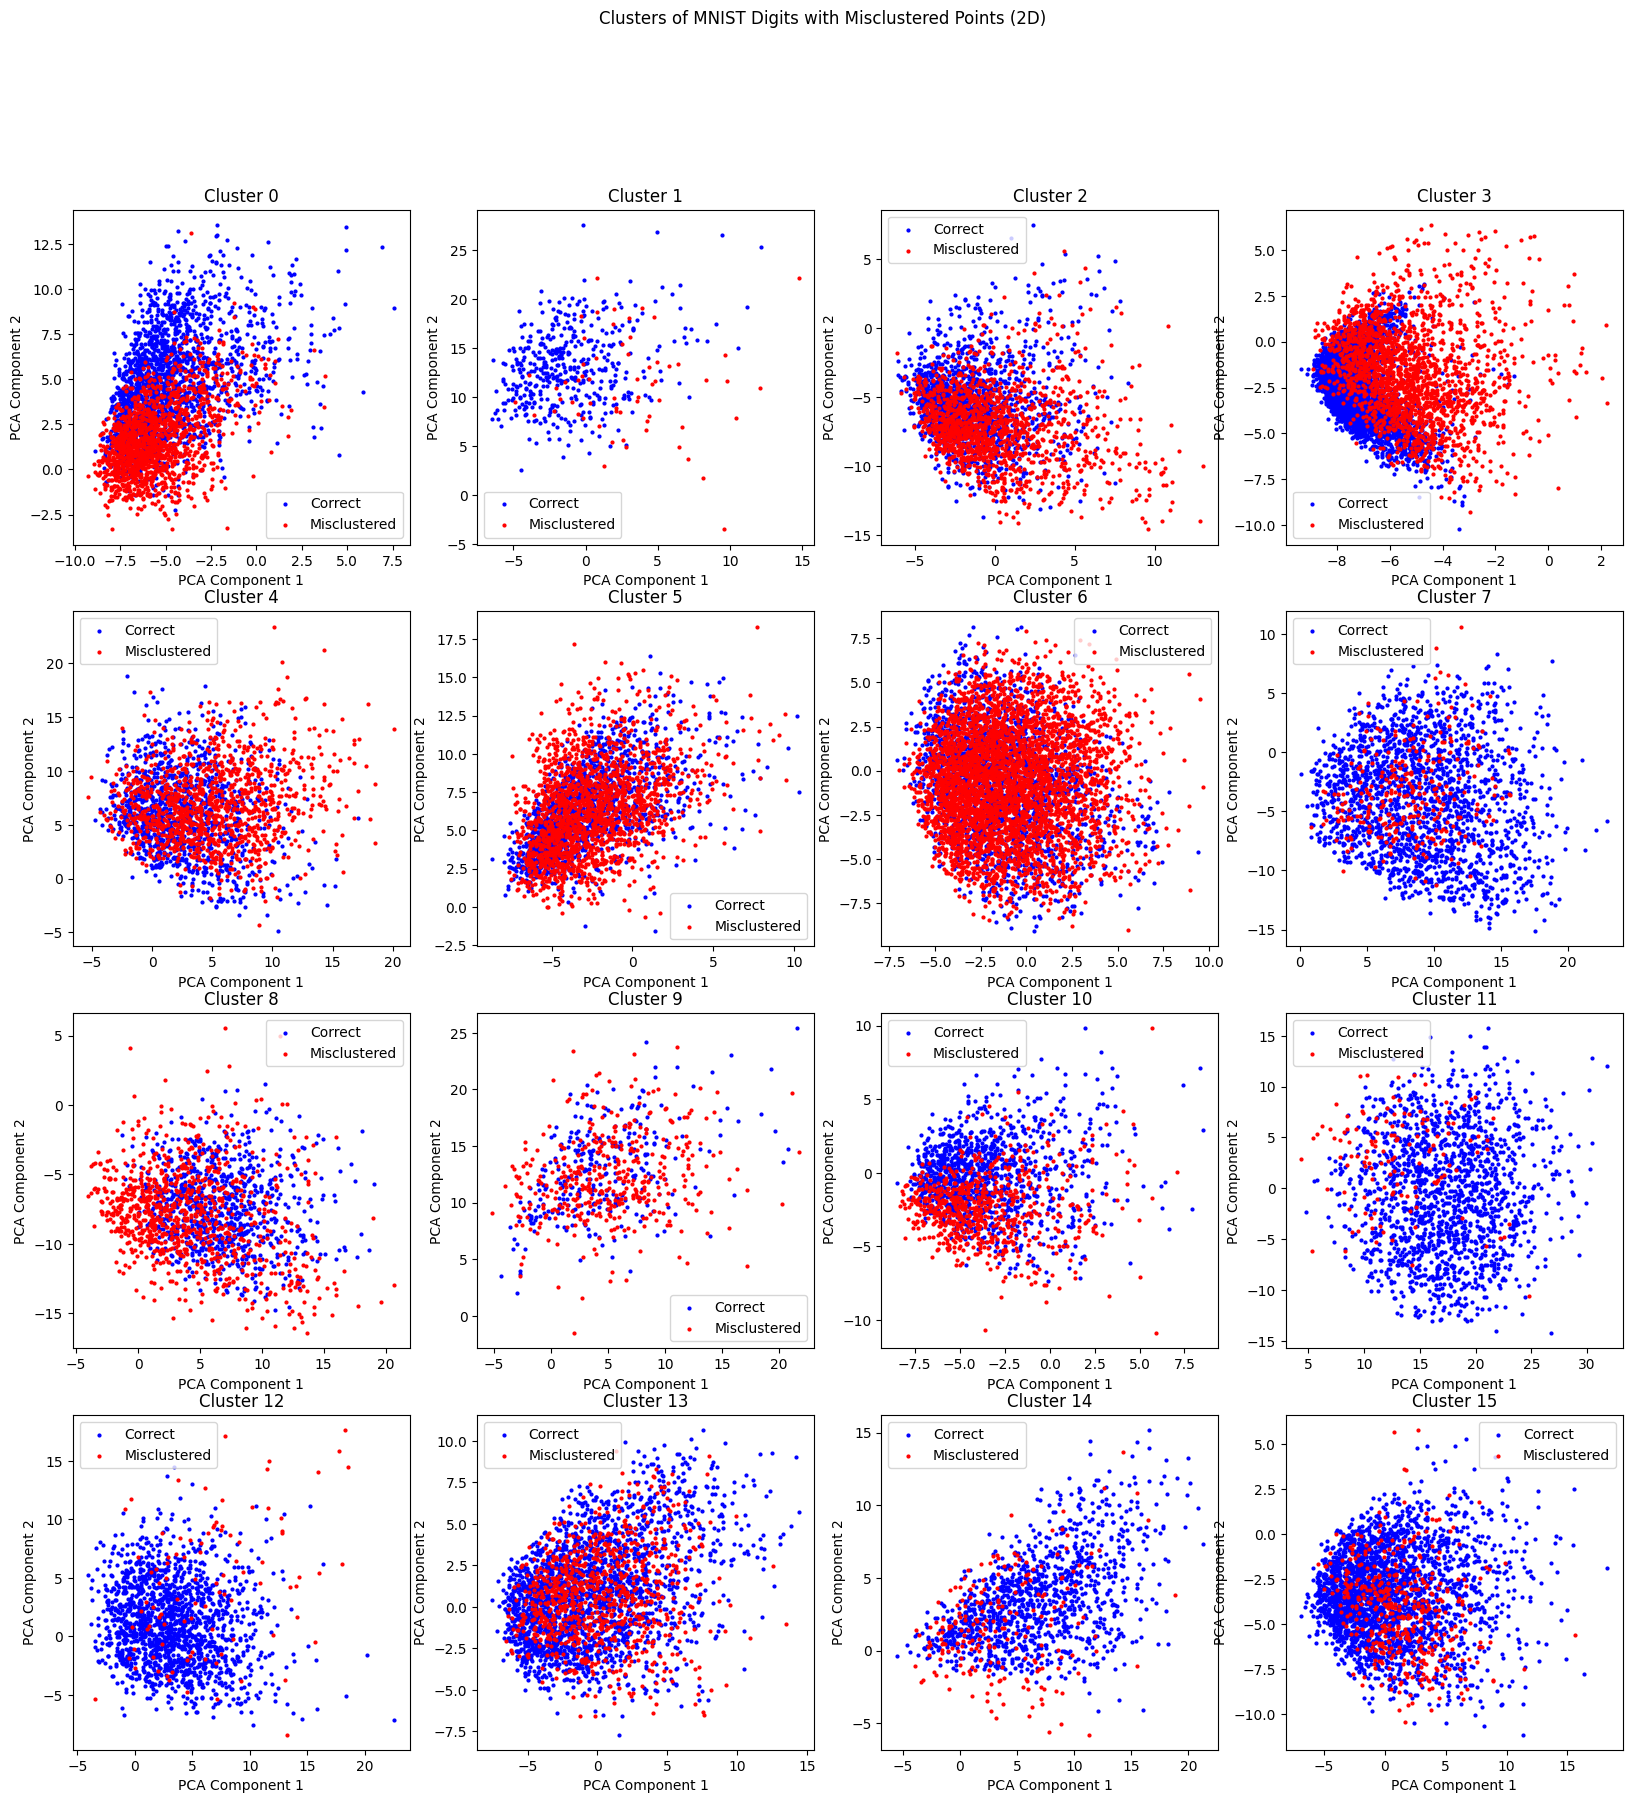

In [50]:
# Create subplots for each cluster
fig = plt.figure(figsize=(20, 20))
for i in range(optimal_clusters):
    ax = fig.add_subplot(4, 4, i+1)
    
    # Get indices of data points belonging to the current cluster
    cluster_indices = np.where(y_kmeans == i)[0]
    
    # Filter true labels and PCA-reduced data points for the current cluster
    cluster_labels = y[cluster_indices]
    cluster_data = X_pca2d[cluster_indices]
    
    # Find the most common true label in the current cluster
    most_common_label = np.bincount(cluster_labels).argmax()
    
    # Separate correctly clustered and misclustered points
    correct_points = cluster_data[cluster_labels == most_common_label]
    misclustered_points = cluster_data[cluster_labels != most_common_label]
    
    # Plot correctly clustered points in blue and misclustered points in red
    ax.scatter(correct_points[:, 0], correct_points[:, 1], color='blue', label='Correct', s=4)  
    ax.scatter(misclustered_points[:, 0], misclustered_points[:, 1], color='red', label='Misclustered', s=4)  
    
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.legend()

plt.suptitle('Clusters of MNIST Digits with Misclustered Points (2D)')
plt.show()


##### Testing 

In [1]:
# Investigate misclustered images
misclustered_examples = []
error = []
accuracies = []
data = []

for i in range(optimal_clusters):
    cluster_indices = np.where(y_kmeans == i)[0]
    true_labels = y[cluster_indices]
    most_common_label = np.bincount(true_labels).argmax()

    temp = []
    # Calculate label counts
    label_counts = np.bincount(true_labels)
    # Calculate total number of data points
    total_points = len(true_labels)

    # Iterate over unique labels
    for label, count in enumerate(label_counts):
        # Calculate percentage of data points for current label
        percentage = (count / total_points) * 100
        temp.append((label, count, percentage))

    data.append(temp)
    misclustered = cluster_indices[true_labels != most_common_label]
    if len(misclustered) > 0:
        misclustered_examples.append((i, misclustered, cluster_indices, most_common_label))

# Display misclustered images
i = 0
for cluster, indices, cluster_indices, most_common_label in misclustered_examples:
    print(f"Cluster {cluster}:\nNumber - {most_common_label}\nmisclustered images: {len(indices)} out of {len(cluster_indices)}")
    for j in data[i]:
        print(f"{j[0]}: {j[1]}({j[2]:.2f}%)", end=", ")

    print("\n")
    error.append(len(indices)/len(cluster_indices))
    accuracies.append(1 - len(indices)/len(cluster_indices))

totError = sum(error)/len(error)
totAccuracy = sum(accuracies)/len(accuracies)

totErrorPercentage = totError * 100
totAccuracyPercentage = totAccuracy * 100

print(f"Total Error: {totErrorPercentage:.2f}%")
print(f"Total Accuracy: {totAccuracyPercentage:.2f}%")


NameError: name 'optimal_clusters' is not defined

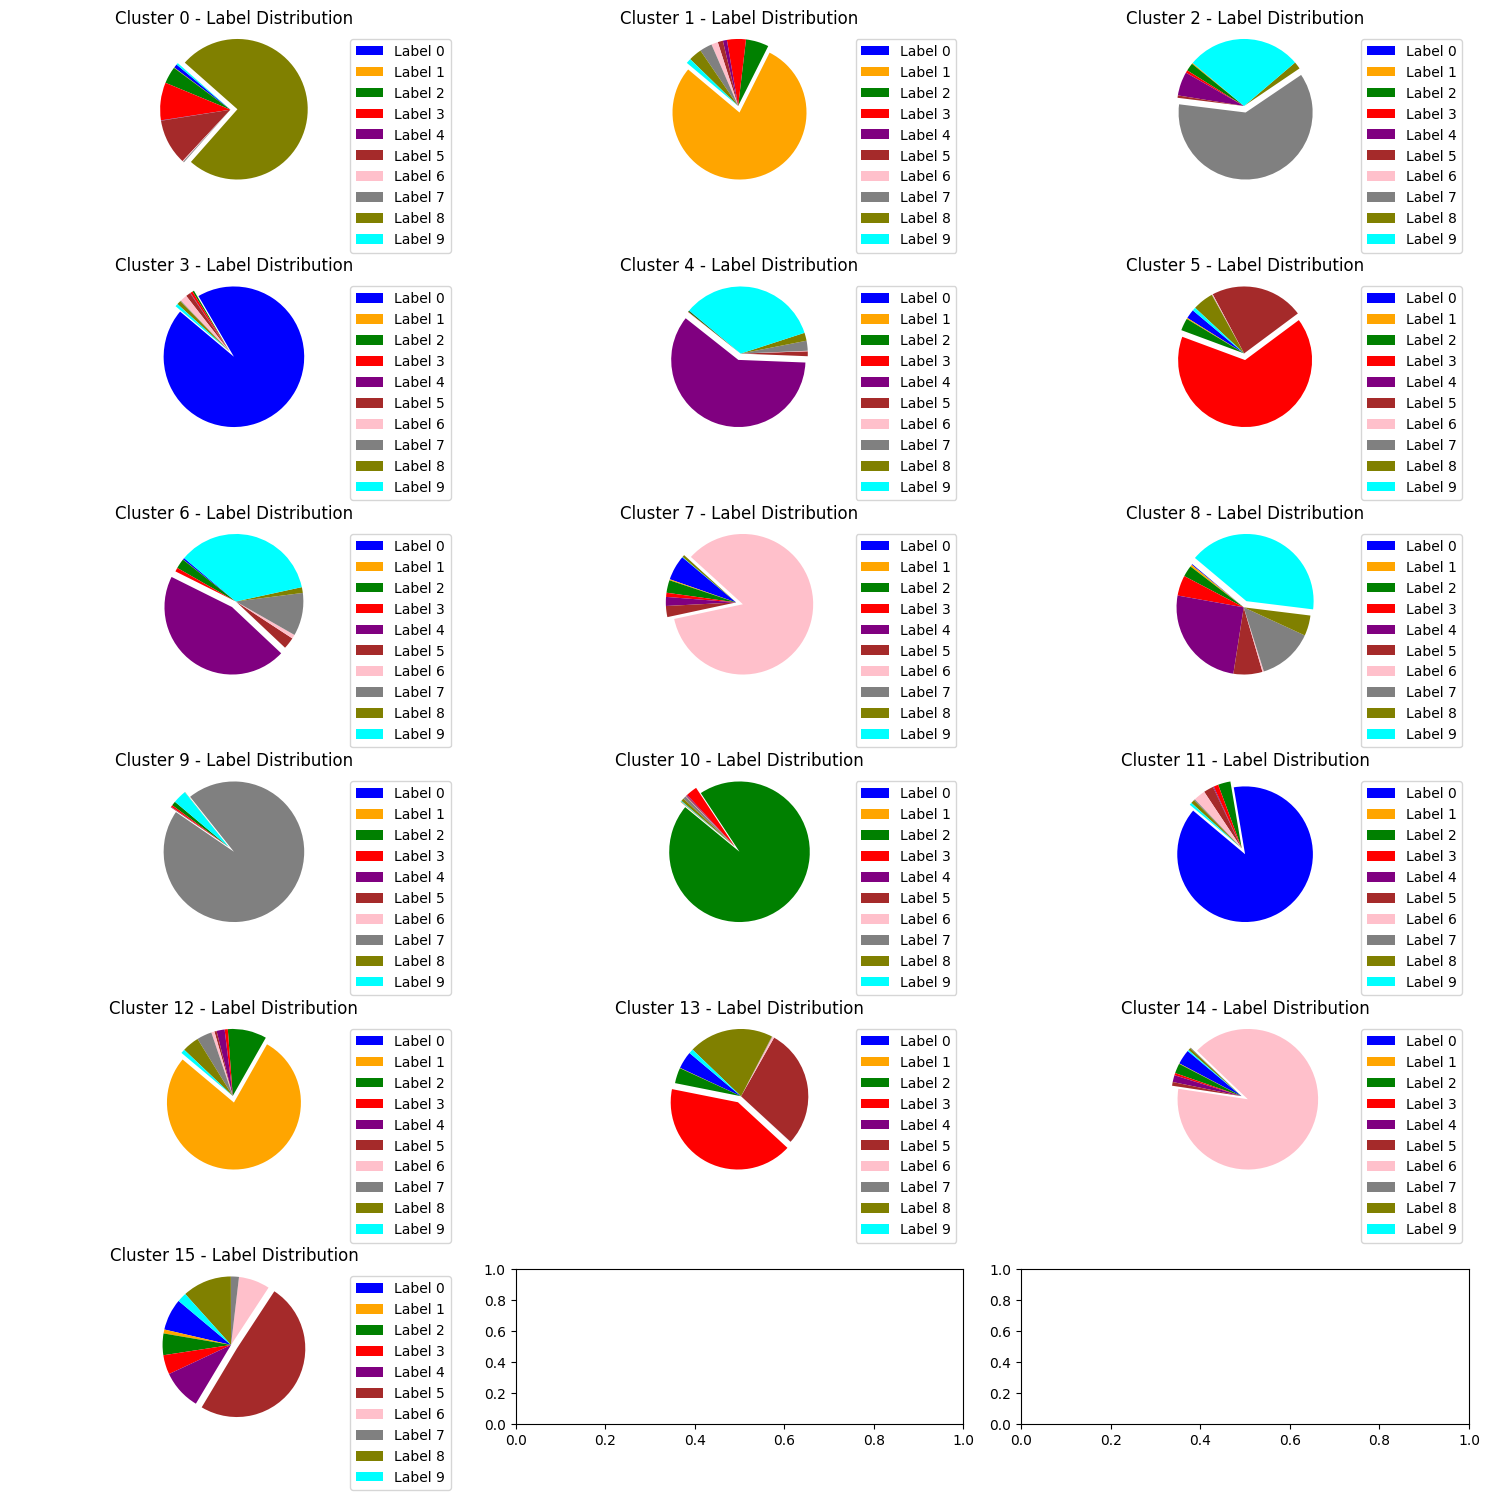

In [34]:
import matplotlib.pyplot as plt

# Define colors for the pie chart
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Calculate the number of clusters
num_clusters = len(data)

# Define the number of columns for the grid layout
num_cols = 3

# Calculate the number of rows needed+
num_rows = (num_clusters + num_cols - 1) // num_cols

# Create a subplot for each cluster
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes if there's only one row or column
if num_rows == 1:
    axs = axs.reshape(1, -1)
elif num_cols == 1:
    axs = axs.reshape(-1, 1)

# Iterate over clusters and plot pie charts
for i, (cluster_data, ax) in enumerate(zip(data, axs.flatten())):
    labels = [f"Label {label}" for label, _, _ in cluster_data]
    sizes = [percentage for _, _, percentage in cluster_data]
    
    # Find the index of the label with the highest percentage
    max_index = sizes.index(max(sizes))
    
    # Set the explode parameter to highlight the label with the highest percentage
    explode = [0] * len(labels)
    explode[max_index] = 0.1
    
    patches, _ = ax.pie(sizes, colors=colors, explode=explode, startangle=140)
    ax.set_title(f'Cluster {i} - Label Distribution')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    
    # Adjust legend position
    ax.legend(patches, labels, loc="upper right", bbox_to_anchor=(1.0, 1.0))

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### END